### Kaggle Competition :
Link:-https://www.kaggle.com/competitions/playground-series-s5e8

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_df = pd.read_csv('train_3.csv')
test_df = pd.read_csv('test_3.csv')

In [4]:
train_df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [5]:
test_df.head().equals(train_df.head())


False

In [6]:
## Understanding the data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         250000 non-null  int64 
 1   age        250000 non-null  int64 
 2   job        250000 non-null  object
 3   marital    250000 non-null  object
 4   education  250000 non-null  object
 5   default    250000 non-null  object
 6   balance    250000 non-null  int64 
 7   housing    250000 non-null  object
 8   loan       250000 non-null  object
 9   contact    250000 non-null  object
 10  day        250000 non-null  int64 
 11  month      250000 non-null  object
 12  duration   250000 non-null  int64 
 13  campaign   250000 non-null  int64 
 14  pdays      250000 non-null  int64 
 15  previous   250000 non-null  int64 
 16  poutcome   250000 non-null  object
dtypes: int64(8), object(9)
memory usage: 32.4+ MB


In [8]:
## Checking the Null values
train_df.isna().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

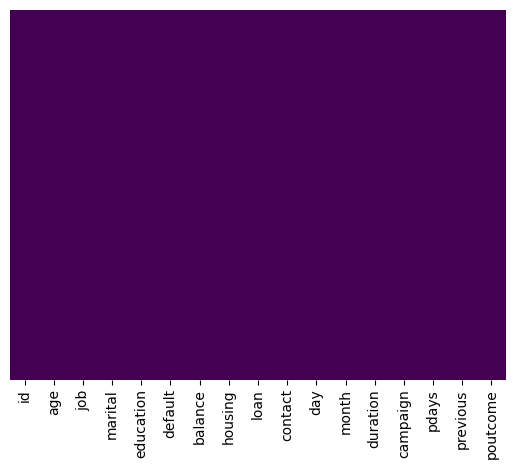

In [9]:
sns.heatmap(test_df.isna(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

## observation
1. There is no missing and null values in test data

In [11]:
test_df.isna().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

<Axes: >

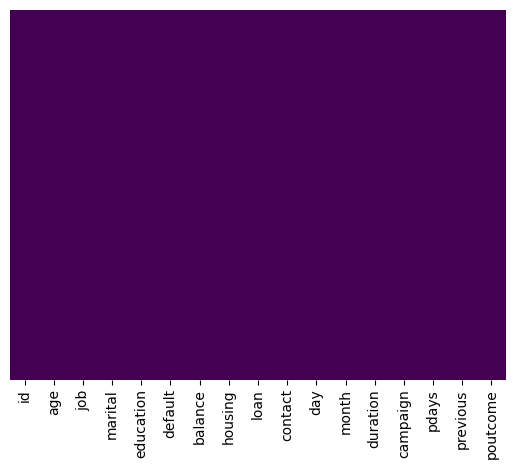

In [12]:
sns.heatmap(test_df.isna(),yticklabels=False,cbar=False,cmap='viridis')

## Observation
1.There is no missing values in test data

In [14]:
train_df[train_df.duplicated()]


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [15]:
test_df[train_df.duplicated()]

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome


## There is no Dublicate values in Test and train data

In [17]:
## Checking the unique value of categorical columns in train data:
categorical_train = [feature for feature in train_df.columns if train_df[feature].dtype =='O']
numeric_trains = train_df.drop(categorical_train,axis=1)
categorical_train

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [18]:
for category in categorical_train:
    print(f"Unique values in '{category}':")
    print(train_df[category].unique())
    print()


Unique values in 'job':
['technician' 'blue-collar' 'student' 'admin.' 'management' 'entrepreneur'
 'self-employed' 'unknown' 'services' 'retired' 'housemaid' 'unemployed']

Unique values in 'marital':
['married' 'single' 'divorced']

Unique values in 'education':
['secondary' 'primary' 'tertiary' 'unknown']

Unique values in 'default':
['no' 'yes']

Unique values in 'housing':
['no' 'yes']

Unique values in 'loan':
['no' 'yes']

Unique values in 'contact':
['cellular' 'unknown' 'telephone']

Unique values in 'month':
['aug' 'jun' 'may' 'feb' 'apr' 'nov' 'jul' 'jan' 'oct' 'mar' 'sep' 'dec']

Unique values in 'poutcome':
['unknown' 'other' 'failure' 'success']



In [19]:
## Checking the categorical value in test data
categorical_test = [feature for feature in test_df.columns if test_df[feature].dtype =='O']
numeric_test = [feature for feature in test_df.columns if test_df[feature].dtype !='O']
categorical_test

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [20]:
for categorical in categorical_test:
    print(f'Unique value in test data{categorical}')
    print(test_df[categorical].unique())
    print()

Unique value in test datajob
['blue-collar' 'management' 'self-employed' 'technician' 'services'
 'retired' 'entrepreneur' 'admin.' 'housemaid' 'unemployed' 'student'
 'unknown']

Unique value in test datamarital
['married' 'single' 'divorced']

Unique value in test dataeducation
['secondary' 'tertiary' 'primary' 'unknown']

Unique value in test datadefault
['no' 'yes']

Unique value in test datahousing
['yes' 'no']

Unique value in test dataloan
['no' 'yes']

Unique value in test datacontact
['unknown' 'cellular' 'telephone']

Unique value in test datamonth
['may' 'apr' 'jul' 'jan' 'feb' 'aug' 'nov' 'jun' 'sep' 'oct' 'mar' 'dec']

Unique value in test datapoutcome
['unknown' 'other' 'failure' 'success']



In [21]:
# performing label incoding in train and test data 

# train_df['default'] = train_df['default'].map({'yes':1,'no':0})
train_df['housing'] = train_df['housing'].map({'yes':1,'no':0})
train_df['loan'] = train_df['loan'].map({'yes':1,'no':0})


In [22]:
train_df['default'] = train_df['default'].map({'yes':1,'no':0})

In [23]:
train_df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,0,7,0,0,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,0,514,0,0,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,0,602,1,0,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,0,34,1,0,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,0,889,1,0,cellular,3,feb,902,1,-1,0,unknown,1


In [24]:
train_df[['housing','loan','default']].isna().sum()

housing    0
loan       0
default    0
dtype: int64

In [25]:
test_df['default'] =test_df['default'].map({'yes':1,'no':0})
test_df['loan'] = test_df['loan'].map({'yes':1,'no':0})
test_df['housing'] = test_df['housing'].map({'yes':1,'no':0})

In [26]:
test_df[['housing','loan','default']].isna().sum()

housing    0
loan       0
default    0
dtype: int64

In [27]:
train_df.drop('id',axis=1,inplace=True)

In [28]:
test_df.drop('id',axis=1,inplace=True)

In [29]:
## split feature and dependent 
X=train_df.drop('y',axis=1)
y = train_df['y']

In [30]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [31]:
num_feature = X.select_dtypes(exclude='object').columns
one_hotColums = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ("OneHotEncoder", oh_transformer, one_hotColums),
        ("StandardScaler", numeric_transformer, num_feature)
    ],
    remainder='passthrough'  # Keeps columns that are not transformed
)


In [32]:
X = preprocessor.fit_transform(X)
test_df = preprocessor.transform(test_df)

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,\
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [71]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Xgboost":XGBClassifier(),
    
    "Naive Byes":BernoulliNB()
}

In [73]:
for name, model in models.items():
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    train_prec = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_roc = roc_auc_score(y_train, y_train_pred)

    # Test metrics
    test_acc = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    test_prec = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_roc = roc_auc_score(y_test, y_test_pred)

    # Output
    print(name)
    print("Model performance for Training set")
    print(f"- Accuracy: {train_acc:.4f}")
    print(f"- F1 score: {train_f1:.4f}")
    print(f"- Precision: {train_prec:.4f}")
    print(f"- Recall: {train_recall:.4f}")
    print(f"- Roc Auc Score: {train_roc:.4f}")
    print('----------------------------------')
    print("Model performance for Test set")
    print(f"- Accuracy: {test_acc:.4f}")
    print(f"- F1 score: {test_f1:.4f}")
    print(f"- Precision: {test_prec:.4f}")
    print(f"- Recall: {test_recall:.4f}")
    print(f"- Roc Auc Score: {test_roc:.4f}")
    print("="*35, "\n")


Logisitic Regression
Model performance for Training set
- Accuracy: 0.9163
- F1 score: 0.9101
- Precision: 0.7135
- Recall: 0.5086
- Roc Auc Score: 0.7403
----------------------------------
Model performance for Test set
- Accuracy: 0.9158
- F1 score: 0.9095
- Precision: 0.7166
- Recall: 0.5081
- Roc Auc Score: 0.7402

Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9060
- F1 score: 0.9062
- Precision: 0.6117
- Recall: 0.6192
- Roc Auc Score: 0.7824

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 0.9999
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9315
- F1 score: 0.9291
- Precision: 0.7567
- Recall: 0.6434
- Roc Auc Score: 0.8074

Gradient Boost
Model performance for Training set
-

In [75]:
## Training on full data
model = XGBClassifier()

In [77]:
model.fit(X,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [79]:
# Prediction on test data
test_pred = model.predict(test_df)

In [85]:
submission = pd.read_csv("sample_submission_3.csv")  
submission["y"] = test_pred
submission.to_csv("Kaggle3.csv", index=False)

In [87]:
from sklearn.model_selection import RandomizedSearchCV
params = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500]
}
xgb = XGBClassifier(eval_metric='logloss', tree_method='hist')
search = RandomizedSearchCV(xgb, param_distributions=params,
                             n_iter=20, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
search.fit(X_train, y_train)
print(search.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'subsample': 1.0, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 1.0}


In [95]:


best_params = {
    'subsample': 1.0,
    'n_estimators': 500,
    'min_child_weight': 1,
    'max_depth': 7,
    'learning_rate': 0.1,
    'gamma': 0.2,
    'colsample_bytree': 1.0,
    'objective': 'binary:logistic',  # For binary classification
    'eval_metric': 'logloss',        # Optional metric
    'tree_method': 'hist'            # Faster for large datasets
}

models = XGBClassifier(**best_params)
models.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0.2,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

In [97]:
y_pred = models.predict(X_test)

In [99]:
roc_auc_score(y_test, y_pred)

0.8237840284160534

In [101]:
test_new_pred = models.predict(test_df)

In [105]:
submission = pd.read_csv("sample_submission_3.csv")  
submission["y"] = test_new_pred
submission.to_csv("Kaggle5.csv", index=False)